# To Do

* Sample statistics
* tables
* 

For next time:
* density catalog
* review text
* tables for spines (GL)
* master table

* calculate local density using sdss spec sample

In [40]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import ks_2samp
%matplotlib notebook
import time
import glob
# importing mplot3d toolkits, numpy and matplotlib 
from mpl_toolkits import mplot3d 

In [41]:
import sys
sys.path.append('/home/rfinn/github/Virgo/programs/')
import virgoCommon

In [42]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'

In [43]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'
%run ~/github/Virgo/programs/readtables.py

In [44]:
%run ~/github/Virgo/programs/readtables.py

In [130]:
v.main

<Table length=6797>
  VFID       RA       DEC     ...               prefix                name  
                              ...                                           
 bytes8   float32   float32   ...              bytes38               bytes8 
-------- --------- ---------- ... --------------------------------- --------
VFID0000 185.86877   74.95225 ...                  VFID0000-NGC4363 VFID0000
VFID0001   182.208  74.904274 ...                  VFID0001-NGC4133 VFID0001
VFID0002 145.94466   74.85958 ...                  VFID0002-NGC2977 VFID0002
VFID0003 185.57309   74.83839 ...              VFID0003-CGCG352-030 VFID0003
VFID0004 182.82774   74.80822 ...                 VFID0004-UGC07189 VFID0004
VFID0005 173.13419   74.62754 ...                  VFID0005-NGC3752 VFID0005
VFID0006 121.91241   74.58463 ...                 VFID0006-UGC04202 VFID0006
VFID0007  118.2363   74.57653 ...              VFID0007-KUG0746+747 VFID0007
VFID0008 274.94318   74.56839 ...                  VFID0008-NGC6643 VFID0008
     ...       ...        ... ...                               ...      ...
VFID6787 190.73863 -1.2293804 ...                 VFID6787-UGC07883 VFID6787
VFID6788 215.62787 -1.2293984 ...                       VFID6788-NA VFID6788
VFID6789 163.18935    -1.2314 ... VFID6789-WISEAJ105245.44-011353.0 VFID6789
VFID6790  191.5875 -1.2501285 ... VFID6790-WISEAJ124620.96-011500.3 VFID6790
VFID6791 186.59453 -1.2542672 ...                    VFID6791-UM501 VFID6791
VFID6792 175.93983 -1.2766024 ...               VFID6792-GAMA143446 VFID6792
VFID6793  170.0766    -1.2806 ... VFID6793-WISEAJ112018.30-011650.6 VFID6793
VFID6794  183.4117 -1.2935266 ... VFID6794-WISEAJ121338.81-011736.9 VFID6794
VFID6795 187.44257 -1.2951077 ...                       VFID6795-NA VFID6795
VFID6796  180.2962 -1.2961195 ...                 VFID6796-UGC07000 VFID6796

# HI Deficiency #


In [34]:
v.a100.colnames

['VFID',
 'RA',
 'DEC',
 'NEDname',
 'modz',
 'e_modz',
 'mod0',
 'e_mod0',
 'vmaxg',
 'e_vmaxg',
 'vmaxs',
 'e_vmaxs',
 'vdis',
 'e_vdis',
 'Separation',
 'PROFMEAN',
 'PROFMEAN_IVAR',
 'QSTOKES',
 'USTOKES',
 'BASTOKES',
 'PHISTOKES',
 'AID',
 'PID',
 'DVERSION',
 'PROFTHETA',
 'FIBERID',
 'MJD',
 'RACAT',
 'DECCAT',
 'HIdef',
 'HIdef_flag',
 'HIdef_bos',
 'HIdef_jon',
 'HIdef_bytype']

### Toribio vs Jones

Toribio shows more HI def whereas center
of Jones distribution is closer to zero.
need to look at Jones paper to see what's going on

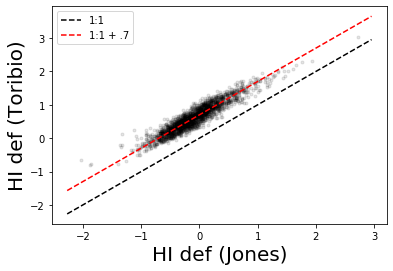

In [50]:
# compare different estimates
flag = v.a100['HIdef_flag']
plt.figure()
plt.plot(v.a100['HIdef_jon'][flag],v.a100['HIdef'][flag],'k.',alpha=.1)
plt.ylabel('HI def (Toribio)',fontsize=20)
plt.xlabel('HI def (Jones)',fontsize=20)
xmin,xmax = plt.xlim()
xl = np.linspace(xmin,xmax, 100)
plt.plot(xl,xl,'k--',label='1:1')
plt.plot(xl,xl+.7,'r--',label='1:1 + .7')
plt.legend()

# Variations with Morphology

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


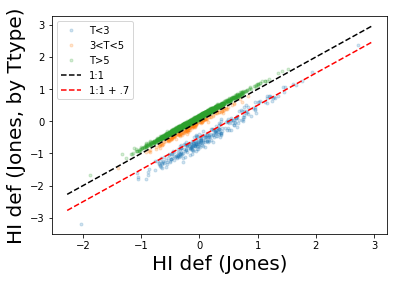

In [66]:
# compare different estimates
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
baseflag = v.a100['HIdef_flag'] &(~np.isnan(v.hl['t']))
flag1 = baseflag & (v.hl['t'] < 3)
flag2 = baseflag & (v.hl['t'] >= 3)& (v.hl['t'] <= 5)
flag3 = baseflag & (v.hl['t'] > 5)
flags = [flag1,flag2,flag3]
labels= ['T<3','3<T<5','T>5']
plt.figure()
for i,f in enumerate(flags):
    plt.plot(v.a100['HIdef_jon'][f],v.a100['HIdef_bytype'][f],'k.',c=mycolors[i],alpha=.2,label=labels[i])
plt.ylabel('HI def (Jones, by Ttype)',fontsize=20)
plt.xlabel('HI def (Jones)',fontsize=20)
xmin,xmax = plt.xlim()
xl = np.linspace(xmin,xmax, 100)
plt.plot(xl,xl,'k--',label='1:1')
plt.plot(xl,xl-.5,'r--',label='1:1 + .7')
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


comparing env=0 and 1
Ks_2sampResult(statistic=0.039373378930808056, pvalue=0.9581704337965835)
comparing env=0 and 2
Ks_2sampResult(statistic=0.14300518134715026, pvalue=0.21799796087939805)
comparing env=1 and 2
Ks_2sampResult(statistic=0.12793501925975548, pvalue=0.21939029453591152)


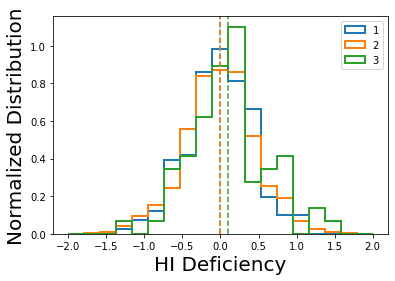

In [104]:
plt.figure()
baseflag = v.a100['HIdef_flag'] &(~np.isnan(v.hl['t'])) & (~np.isnan(v.a100['HIdef_bytype']))
flag0 = baseflag & (v.env['flag_env'] == 0)
flag1 = baseflag & (v.env['flag_env'] == 1)
flag2 = baseflag & (v.env['flag_env'] == 2)
flag3 = baseflag & (v.env['flag_env'] == 3)
flags = [flag1,flag2,flag3]
labels= ['1','2','3']
mybins = np.linspace(-2,2,20)
for i,f in enumerate(flags):
    var = v.a100['HIdef_bytype'][f]
    t=plt.hist(var,color=mycolors[i],label=labels[i],histtype='step',bins=mybins,lw=2,normed=True)
    #print(np.median(var))
    plt.axvline(x=np.median(var),color=mycolors[i],ls='--')
plt.legend()
plt.xlabel('HI Deficiency',fontsize=20)
plt.ylabel('Normalized Distribution',fontsize=20)

# compare distributions with KS test
print('comparing env=0 and 1')
print(ks_2samp(v.a100['HIdef_bytype'][flag1],v.a100['HIdef_bytype'][flag2]))
print('comparing env=0 and 2')
print(ks_2samp(v.a100['HIdef_bytype'][flag1],v.a100['HIdef_bytype'][flag3]))
print('comparing env=1 and 2')
print(ks_2samp(v.a100['HIdef_bytype'][flag2],v.a100['HIdef_bytype'][flag3]))

* look at galaxies at fixed stellar mass cut
* look at local density
* look at spatial distribution - only have HI for region of ALFALFA

Text(0, 0.5, 'BV Environment Flag')

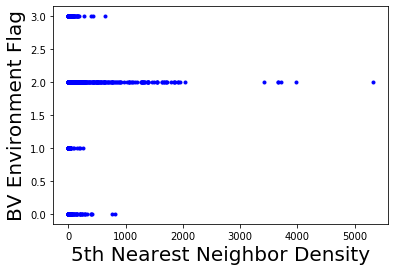

In [97]:
plt.figure()
plt.plot(v.env['n5th'],v.env['flag_env'],'b.')
plt.xlabel('5th Nearest Neighbor Density',fontsize=20)
plt.ylabel('BV Environment Flag',fontsize=20)

In [84]:
v.env.colnames

['VFID_1',
 'prefix',
 'radius',
 'objname',
 'Vcosmic',
 'DEC',
 'radius_flag',
 'SGY',
 'SGX',
 'SGZ',
 'NSAID',
 'NEDname',
 'Dmedian',
 'nCI08',
 'RA',
 'Virgo_infall',
 'Steerflag',
 'HAflag',
 'distSGY_Virgo',
 'Vmodel',
 'distSGZ_Virgo',
 'HAobsflag',
 'V_LG',
 'nCI08_err',
 'n5th_2D',
 'name',
 'n5th_2D_err',
 'vr',
 'flag_cluster',
 'n5th',
 'distSGX_Virgo',
 'n5th_err',
 'VFID_2',
 'flag_env']

# Catalog Statistics #

In [127]:
def printstats(flag,name):
    print(name+' stats')
    print('number = {:4d}/{:4d} ({:.3f})'.format(sum(flag),len(flag),sum(flag)/len(flag)))

In [108]:
print('total number of galaxies in the catalog = ',len(v.main))
print('number with HL data = ',sum(v.main['HLflag']))
print('fraction with HL data = %.3f '%(sum(v.main['HLflag'])/len(v.main)))

total number of galaxies in the catalog =  6797
number with HL data =  6636
fraction with HL data = 0.976 


In [133]:
flags = ['HLflag','NSAflag','NSAV0flag','A100flag','COflag','HAflag','HAobsflag','Steerflag','Z0MGSflag','unwiseflag']
for f in flags:
    printstats(v.main[f],f)

HLflag stats
number = 6636/6797 (0.976)
NSAflag stats
number = 5284/6797 (0.777)
NSAV0flag stats
number = 5248/6797 (0.772)
A100flag stats
number = 2336/6797 (0.344)
COflag stats
number =  242/6797 (0.036)
HAflag stats
number =   48/6797 (0.007)
HAobsflag stats
number =  100/6797 (0.015)
Steerflag stats
number = 1884/6797 (0.277)
Z0MGSflag stats
number = 2375/6797 (0.349)
unwiseflag stats
number = 6126/6797 (0.901)


# Sample Overview

Text(0.5, 1.0, 'Virgo Filament Sample v1')

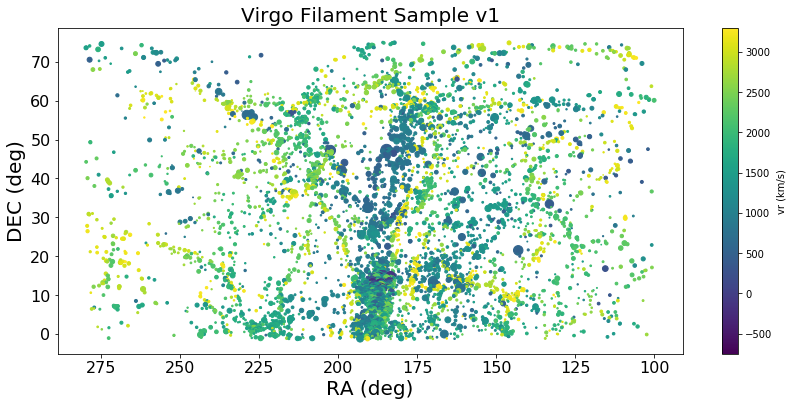

In [178]:
plt.figure(figsize=(14,6))
plt.scatter(v.main['RA'],v.main['DEC'],c=v.main['vr'],s=v.main['radius']/4)
plt.colorbar(label='vr (km/s)')
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().invert_xaxis()
plt.title('Virgo Filament Sample v1',fontsize=20)

# HI Sources

In [213]:
def plot_subset(flag,label,color=None,cbscale=None,size=None):
    ''' cbscale is (vmin,vmax) '''
    if color is None:
        color = v.main['vr']
    if size is None:
        size=15*np.ones(len(flag))
        
    plt.figure(figsize=(14,6))
    plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,markersize=2)
    if cbscale is None:
        plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=color[flag],s=size[flag],zorder=10,label=label,cmap='viridis_r')
    else:
        plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=color[flag],s=size[flag],zorder=10,label=label,vmin=cbscale[0],vmax=cbscale[1],cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('RA (deg)',fontsize=20)
    plt.ylabel('DEC (deg)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().invert_xaxis()
    plt.legend()

Text(0.5, 1.0, 'ALFALFA HI Deficiency')

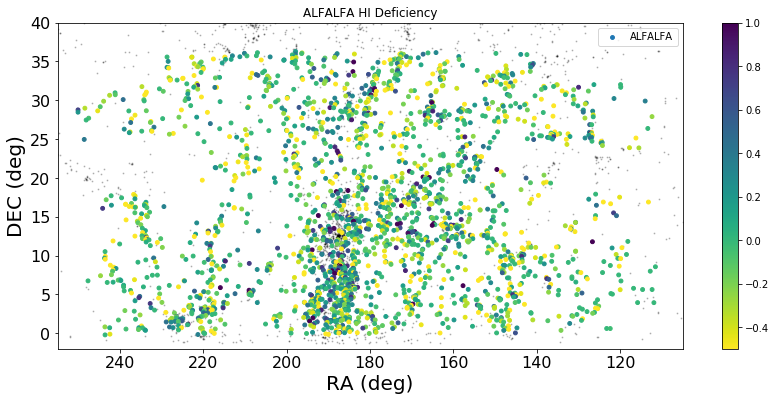

In [214]:
flag = v.main['A100flag']
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-.5,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA HI Deficiency')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


Text(0.5, 1.0, 'ALFALFA HI Rich: HI Deficiency < -0.5')

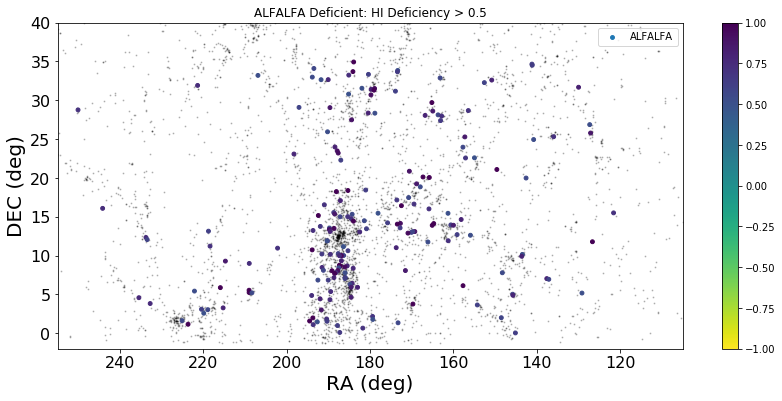

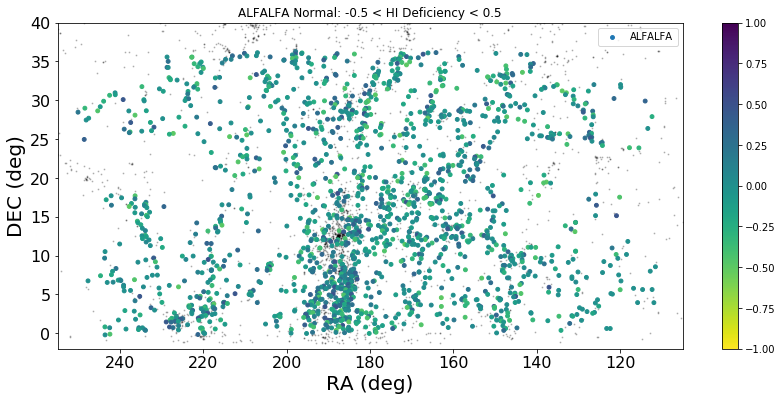

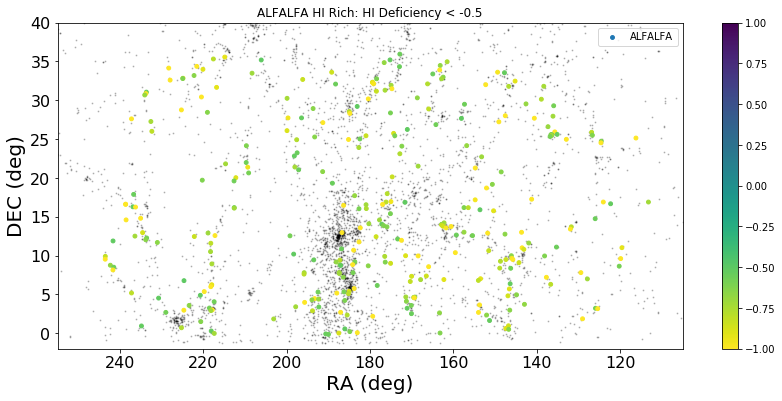

In [217]:
# deficient galaxies
flag = v.main['A100flag'] & (v.a100['HIdef_bytype'] > .5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA Deficient: HI Deficiency > 0.5')
# deficient galaxies
flag = v.main['A100flag'] & (v.a100['HIdef_bytype'] < .5)  & (v.a100['HIdef_bytype'] > -.5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA Normal: -0.5 < HI Deficiency < 0.5')
# deficient galaxies
flag = v.main['A100flag'] &  (v.a100['HIdef_bytype'] < -.5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA HI Rich: HI Deficiency < -0.5')

# Checking coordinates

* some are f4 and others are f8
* not sure what the combined RA is not f8 because I specifically declare it as 'f' clean_kitchen_sink

In [232]:
%run ~/github/Virgo/programs/readtables.py
# HL
print(v.hl['RA'].dtype)
print(v.hl['al2000'].dtype)
# NSA v0
print(v.nsav0['RA_1'].dtype)
print(v.nsav0['RA_2'].dtype)
# NSA v1
print(v.nsav1['RA_1'].dtype)
print(v.nsav1['RA_2'].dtype)
# A100

print(v.a100['RA'].dtype)
print(v.a100['RAdeg_Use'].dtype)

>f8
>f8
>f8
>f8
>f8
>f8
>f8
>f8


In [227]:
t = np.zeros(10,'f8')
print(t[0].dtype)

float64


# Plots to make

* compare ALFALFA HI and Nancy HI


In [235]:
v.co['MHI']

<MaskedColumn name='MHI' dtype='float64' length=6797>
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
...
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

# Tables for Catalog papers

* starting with code from a100 paper

### Main Table

* VFID
* our RA, DEC, recession velocity
* HL objname, RA, DEC, vr
* NSA v0 objname, RA, DEC, Z
* NSA v1 objname, RA, DEC, Z
* ALFALFA name, ra, dec, vr, HImass
* flag for CO (Gianluca's paper)
* flag of HI (Gianluca's paper)

In original list, but removed:
* (photometry from JM)
* (our SFR, logMstar)

### Environment

supergalactic coordinates
local density sigma$_5$
local density sigma 10
filament/field/cluster flag
closest filament
orientation wrt filament
redshift-independent distance
flow-corrected distance/recession velocity
group membership
group halo mass

### Filaments

number of galaxies in filament
size (length, volume, etc)
range in SG coordinates
richness

For each filament, give coordinates of spine in SG coordinates, distance, and also RA, DEC

    RA,DEC
    SG X, Y, Z (Mpc)
    position angle (tangent to filament at that point)


In [78]:
%run ~/github/Virgo/programs/write_tables_catalog_paper.py
v.print_table1()

In [83]:
v.env

<Table length=6797>
 VFID_1                prefix                radius  ... flag_fie flag_gro
 bytes8               bytes38               float32  ... float64  float64 
-------- --------------------------------- --------- ... -------- --------
VFID0000                  VFID0000-NGC4363 23.829847 ...      1.0      0.0
VFID0001                  VFID0001-NGC4133   49.6731 ...      1.0      0.0
VFID0002                  VFID0002-NGC2977   62.3909 ...      1.0      0.0
VFID0003              VFID0003-CGCG352-030 26.128908 ...      1.0      0.0
VFID0004                 VFID0004-UGC07189 40.937492 ...      1.0      0.0
VFID0005                  VFID0005-NGC3752 48.654305 ...      1.0      0.0
VFID0006                 VFID0006-UGC04202 26.984928 ...      1.0      0.0
VFID0007              VFID0007-KUG0746+747 23.448833 ...      1.0      0.0
VFID0008                  VFID0008-NGC6643  99.56834 ...      1.0      0.0
VFID0009                 VFID0009-UGC07238 39.547703 ...      1.0      0.0
     ...                               ...       ... ...      ...      ...
VFID6787                 VFID6787-UGC07883  76.22918 ...      1.0      0.0
VFID6788                       VFID6788-NA 15.926534 ...      1.0      0.0
VFID6789 VFID6789-WISEAJ105245.44-011353.0 10.648694 ...      1.0      0.0
VFID6790 VFID6790-WISEAJ124620.96-011500.3  9.933933 ...      1.0      0.0
VFID6791                    VFID6791-UM501 14.458434 ...      0.0      0.0
VFID6792               VFID6792-GAMA143446      30.0 ...      1.0      0.0
VFID6793 VFID6793-WISEAJ112018.30-011650.6 10.394707 ...      1.0      0.0
VFID6794 VFID6794-WISEAJ121338.81-011736.9 7.6404905 ...      1.0      0.0
VFID6795                       VFID6795-NA 19.369627 ...      1.0      0.0
VFID6796                 VFID6796-UGC07000 26.008856 ...      1.0      0.0

In [84]:
v.fil

<Table length=6797>
       SGY                 SGX         ...  filament  objname  
     float64             float64       ...  bytes40   bytes28  
------------------ ------------------- ... --------- ----------
11.738032079989287  13.145689815736862 ...       ---    NGC4363
 7.017661982903995    7.90894905971585 ...       ---    NGC4133
18.236938715608805   24.57232008873139 ...       ---    NGC2977
  14.3805709158205   16.04972421363977 ...       ---  PGC040048
 13.42946756799603  15.062039166171804 ...       ---   UGC07189
 14.24733084177353   16.36887945443161 ...       ---    NGC3752
14.429624490058709  23.823428368645985 ...       ---   UGC04202
13.506784603390928  23.147324448597697 ...       ---  PGC022064
  6.34142153819484  11.358746335611848 ...       ---    NGC6643
 13.57513261426242   15.04051810675452 ...       ---   UGC07238
               ...                 ... ...       ...        ...
26.677692322485886 -13.486639599767207 ...       ---   UGC07883
15.365245806045172 -10.329395658436509 ...       --- PGC1123741
6.4060681149299725 -2.1699810543271267 ...       --- PGC3286596
 26.00767790775234 -13.290425037005736 ...       --- PGC1123239
19.900737222095287   -9.58565131384563 ... W-M_Sheet  PGC040683
17.414428225304132 -7.3066119171159345 ...       --- GAMA143446
24.621041828170757  -9.456379013071517 ...       --- PGC3288547
 23.16470968032566 -10.745670987988538 ...       --- PGC1122171
  21.9139265433092  -10.68297698963353 ...       ---  PGC135806
 10.46500368374368  -4.664287144328092 ...       ---   UGC07000

In [45]:
%run ~/github/Virgo/programs/write_tables_catalog_paper.py
v.print_table2()
v.print_table1()

In [46]:
!less /home/rfinn/research/Virgo/papers/catalog_paper/table1.tex

\begin{table*}%[ptbh!]
\begin{center}
\scriptsize
\setlength\tabcolsep{3.0pt} 
\tablenum{4} 
\caption{Main Catalog with Cross IDs\label{tab:main}  } 
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline 
\toprule 
VFID   & RA &   DEC &   V$_{helio}$ &   D &     $\sigma_D$  & HL~name & NSAID V0 & NSAID V1 & AGC Name & NED Name & CO Source \\ 
& J2000 & J2000 & $km~s^{-1}$ & Mpc & Mpc & &  & & && \\ 
(1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) & (9) & (10) & (11) & (12) \\ 
\midrule 
\hline 
VFID3000 & 158.194287 & 28.92043 & 1805.2 & 10 & 1 &SDSSJ103246.63+285513.4& 107761& 497681 & 208562& WISEA J103246.69+285513.2& False\\ 
VFID3001 & 184.264160 & 28.91394 & 884.6 & 10 & 1 &PGC1849931& 102795& 479646 & \nodata& N/A& False\\ 
VFID3002 & 185.808177 & 28.89382 & 575.5 & 10 & 1 &IC3247& 161637& 667462 & 7459& IC 3247& False\\ 
VFID3003 & 165.930807 & 28.88713 & 708.1 & 10 & 1 &NGC3510& 100677& 472983 & 6126& NGC 3510& False\\ 
:home/rfinn/research/Virgo/papers/catalog_paper/table1.tex

# Edge effects - plotting full NSA catalog vs our

In [5]:
nsa = Table.read('/home/rfinn/research/NSA/nsa_v1_0_1.fits')

In [42]:
# using a 20 deg slice around our coord
leftflag = (nsa['RA'] < 110) & (nsa['RA'] > 80)
rightflag = (nsa['RA'] > 280) & (nsa['RA'] < 300)
rabox = (nsa['RA'] > 80) & (nsa['RA'] < 300)
decflag = ((nsa['DEC'] > 75) | (nsa['DEC'] < -1.3))
zflag = (nsa['Z']*3e5 < 3500) & (nsa['Z']*3.e5 > 500)
nflag = zflag & (leftflag | rightflag | (~leftflag & ~rightflag & decflag & rabox) )

In [43]:
sum(nflag)

352

Text(0, 0.5, 'DEC (deg)')

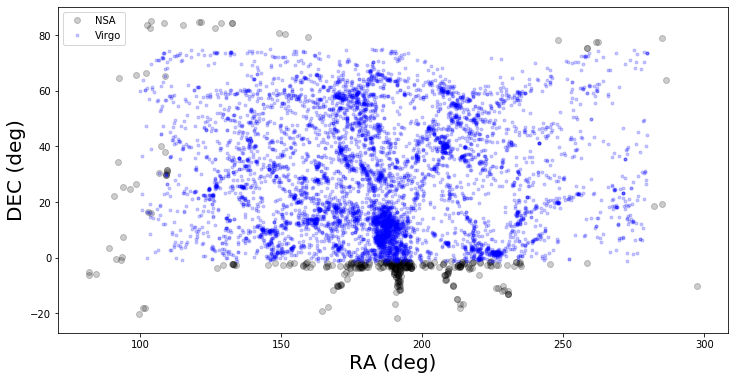

In [46]:
plt.figure(figsize=(12,6))
plt.plot(nsa['RA'][nflag],nsa['DEC'][nflag],'ko',alpha=.2,label='NSA')
plt.plot(v.main['RA'],v.main['DEC'],'b.',alpha=.2,label='Virgo')
plt.legend()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)

# Testing 3D Plots

* show SGX, SGY, SGZ for filament members (filament catalog)

* overplot spines

* versions color coded by
  * 3D distance
  * local density n5 3D
  * show
    * members (big)
    * all galaxies (small)
    * CO sources
  * with groups vs non group galaxies

### Test filaments

* NGC Filament (good example)
* one filament that we detected, to motivate why we need to discuss in more detail the filament selection process

In [6]:

os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py

In [129]:

os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])
print(allfil)

{'NGC5353_4_Filament', 'LeoII_A_Filament', 'Leo_Minor_B_Filament', 'Canes_Venatici_Filament', 'Virgo_Serpens_Filament', 'LeoII_B_Filament', 'Virgo_Draco_Filament', 'Leo_Minor_Filament', 'Virgo_Coma_Berenices_Filament', 'W-M_Sheet', 'VirgoIII_Filament', 'Ursa_Major_Cloud'}


In [88]:
virgoCommon.SGXrange['NGC5353_4_Filament']

[-12.17, 8.88]

In [58]:
filament_string = 'NGC5353_4_Filament'
filament_string = 'VirgoIII_Filament'
filflag = v.fil['filament'] == filament_string
# set limits of cube
fxlim=[-11,-5]
fylim = [11,18]
fzlim = [3,12]
# read in spine
spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
spine  = Table.read(spinedir+'filament_spine_'+filament_string+'.fits')

In [15]:
os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])
print(allfil)

{'Virgo_Serpens_Filament', 'NGC5353_4_Filament', 'Leo_Minor_Filament', 'LeoII_A_Filament', 'Virgo_Coma_Berenices_Filament', 'Ursa_Major_Cloud', 'W-M_Sheet', 'VirgoIII_Filament', 'LeoII_B_Filament', 'Leo_Minor_B_Filament', 'Canes_Venatici_Filament', 'Virgo_Draco_Filament'}


In [66]:

def make_3dplot(vmin,vmax,color,colorname,flag=None):
    if flag is not None:
        filflag=flag
        
    fig = plt.figure(figsize=(10,8)) 
    # syntax for 3-D projection 
    ax = plt.axes(projection ='3d') 
    
    xmin = min(v.fil['SGX'][filflag]) - 2
    xmax = max(v.fil['SGX'][filflag]) + 2
    
    ymin = min(v.fil['SGY'][filflag]) - 2
    ymax = max(v.fil['SGY'][filflag]) + 2
    
    zmin = min(v.fil['SGZ'][filflag]) - 2
    zmax = max(v.fil['SGZ'][filflag]) + 2
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_zlim(zmin,zmax)
    
    
    clipflag = (v.fil['SGX'] > xmin) & (v.fil['SGX'] < xmax) & (v.fil['SGY'] > ymin) & (v.fil['SGY'] < ymax) & (v.fil['SGZ'] > zmin) & (v.fil['SGZ'] < zmax) 
    # plotting 
    #ize = (np.log10(v.nsav0['MASS'])-7)*30
    p = ax.scatter(v.fil['SGX'][filflag], v.fil['SGY'][filflag], v.fil['SGZ'][filflag],c=color[filflag],s=30,vmin=vmin,vmax=vmax)#,cmap='gnuplot') 
    flag = filflag & v.main['COflag']
    p = ax.scatter(v.fil['SGX'][flag], v.fil['SGY'][flag], v.fil['SGZ'][flag],c=color[flag],s=100,vmin=vmin,vmax=vmax)
    fig.colorbar(p,label=colorname)
    ax.plot3D(v.fil['SGX'][clipflag], v.fil['SGY'][clipflag], v.fil['SGZ'][clipflag],'c.',color='0.5',alpha=.4) 
    ax.set_title(filament_string)
    ax.set_xlabel('SGX')
    ax.set_ylabel('SGY')
    ax.set_zlabel('SGZ')

    
    #ax.set_xlim(fxlim[0],fxlim[1])
    #ax.set_ylim(fylim[0],fylim[1])
    #ax.set_zlim(fzlim[0],fzlim[1])
    #ax.axis('equal')

    ax.plot3D(spine['SGX'], spine['SGY'], spine['SGZ'],'k') 
    plt.show() 
    
def plot3d_colorby_dist3D(flag=None):
    vmin,vmax = .22,5
    color = v.fil['filament_dist_3D']
    colorname='dist_3D'
    make_3dplot(vmin,vmax,color,colorname,flag=flag)
    
def plot3d_colorby_localdens(flag=None):
    vmin,vmax = -1,1.5
    color = np.log10(v.env['n5th'])
    colorname='n5th_3D'
    make_3dplot(vmin,vmax,color,colorname,flag=flag)
    
def plot3d_colorby_mass(flag=None):
    vmin,vmax = 8,10
    color = np.log10(v.nsav0['MASS'])
    colorname='NSA Mass'
    make_3dplot(vmin,vmax,color,colorname,flag=flag)

<IPython.core.display.Javascript object>


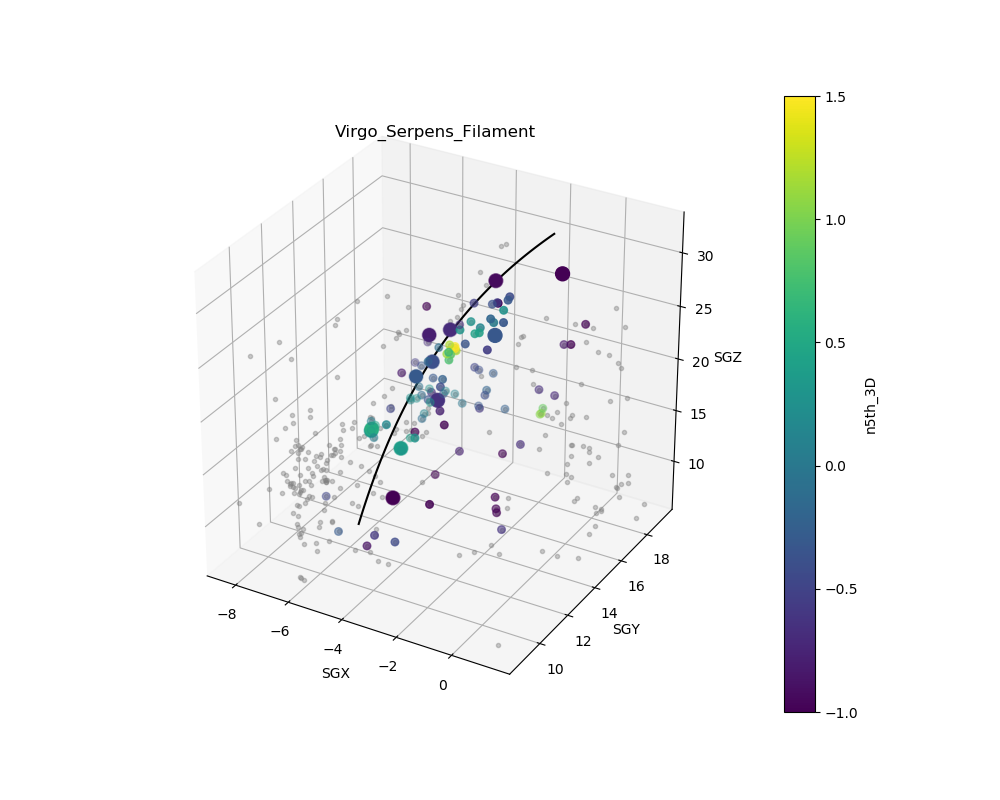

<IPython.core.display.Javascript object>


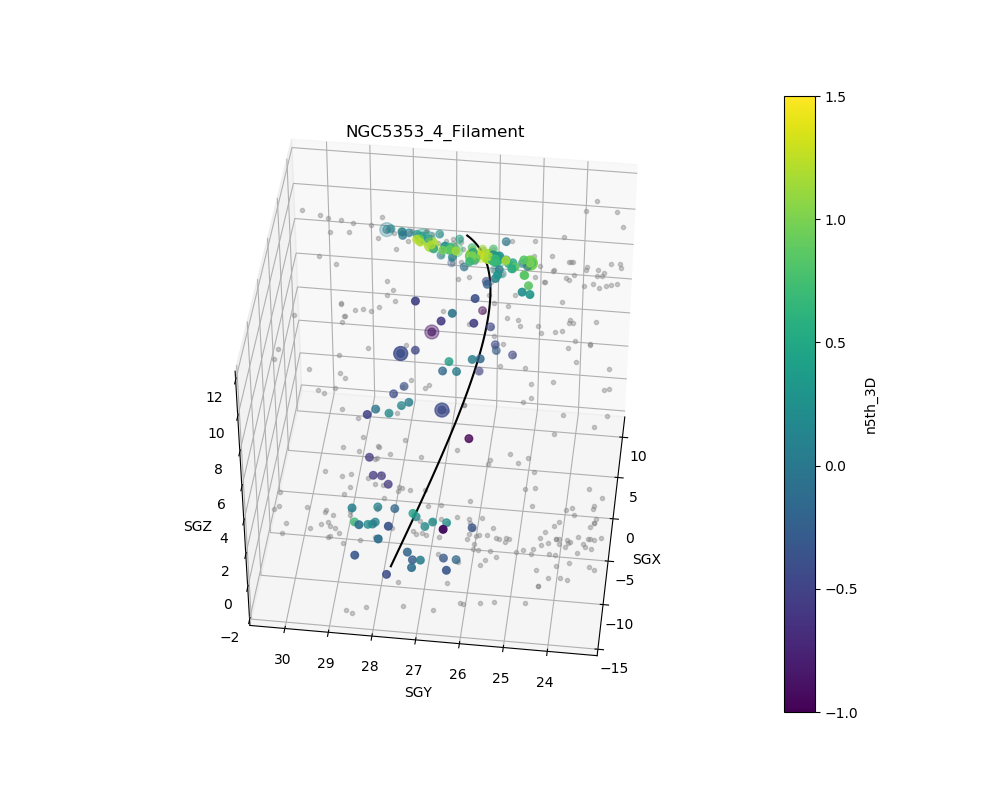

<IPython.core.display.Javascript object>


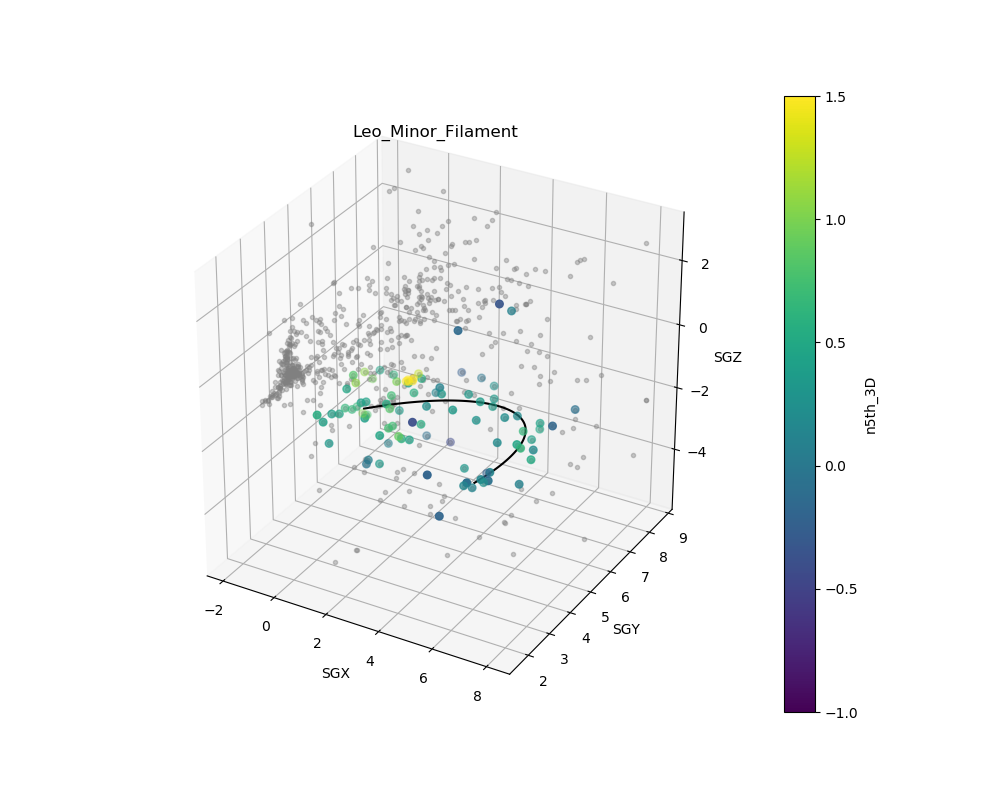

<IPython.core.display.Javascript object>


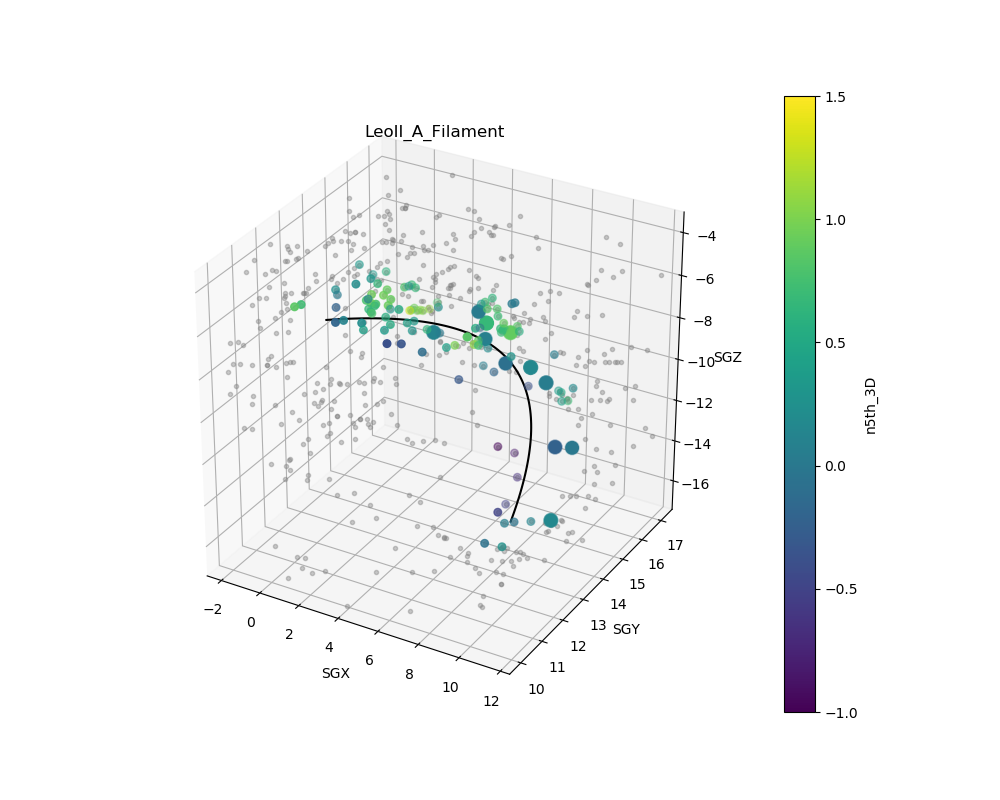

<IPython.core.display.Javascript object>


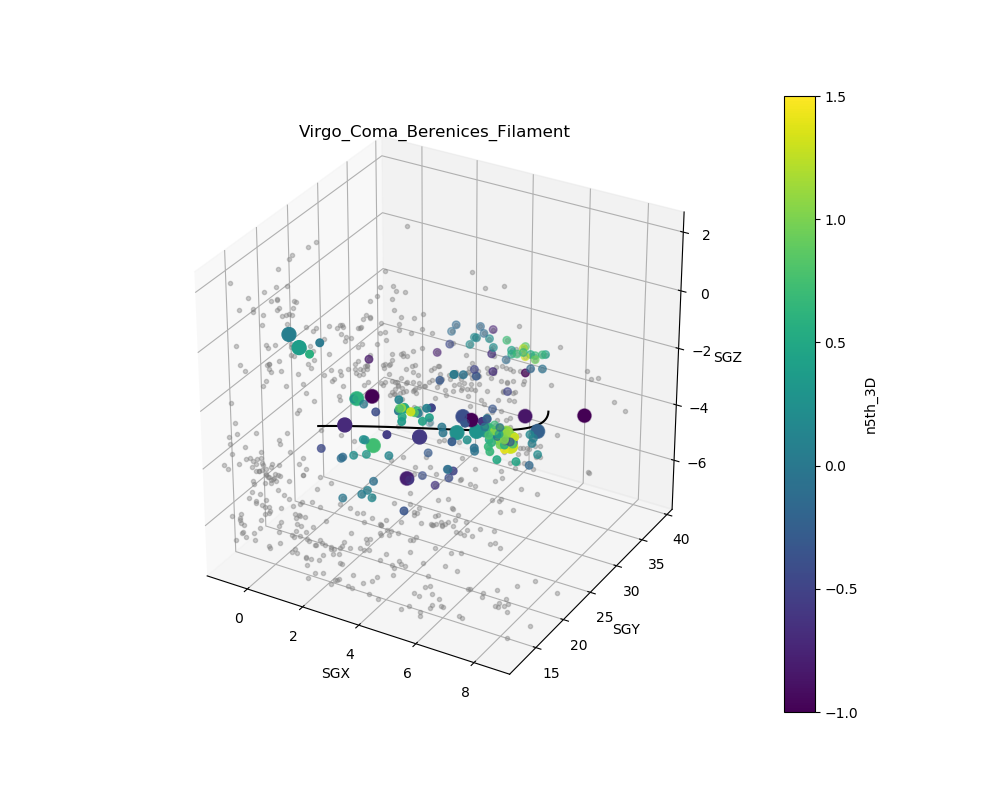

<IPython.core.display.Javascript object>


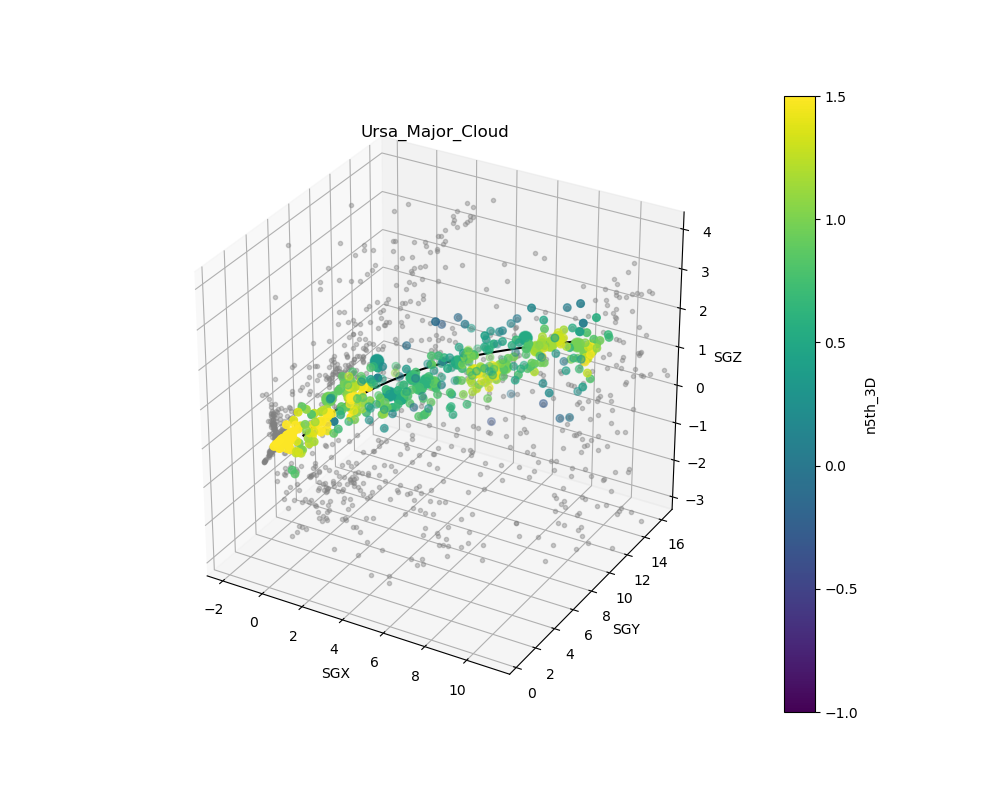

<IPython.core.display.Javascript object>


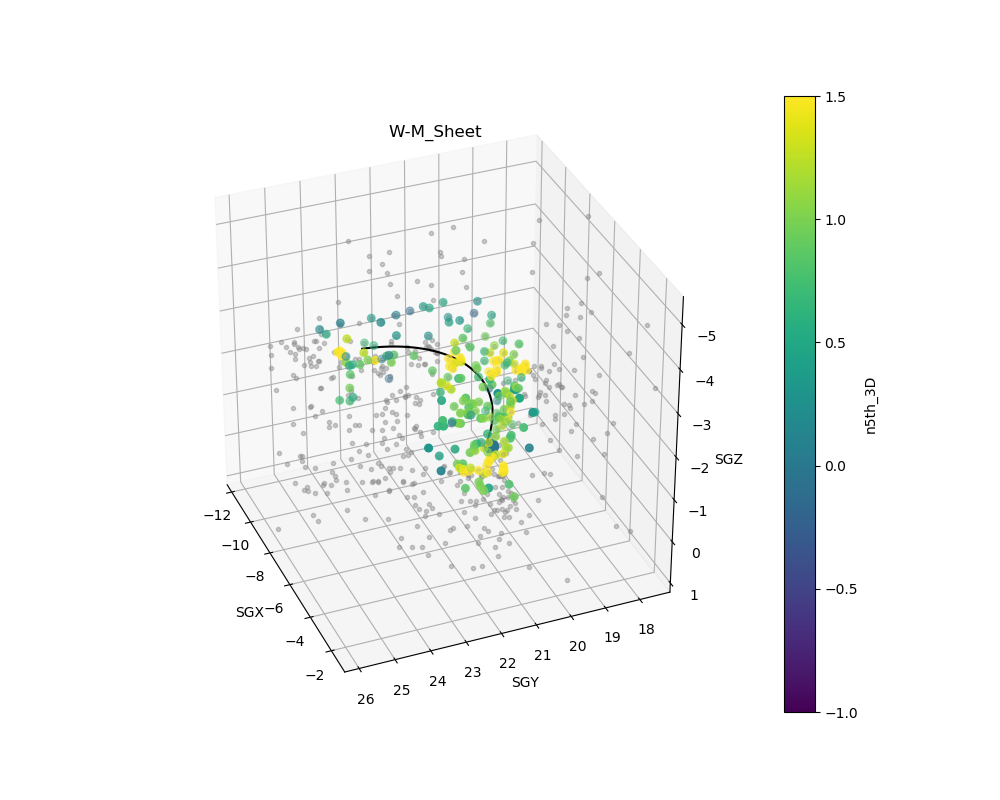

<IPython.core.display.Javascript object>


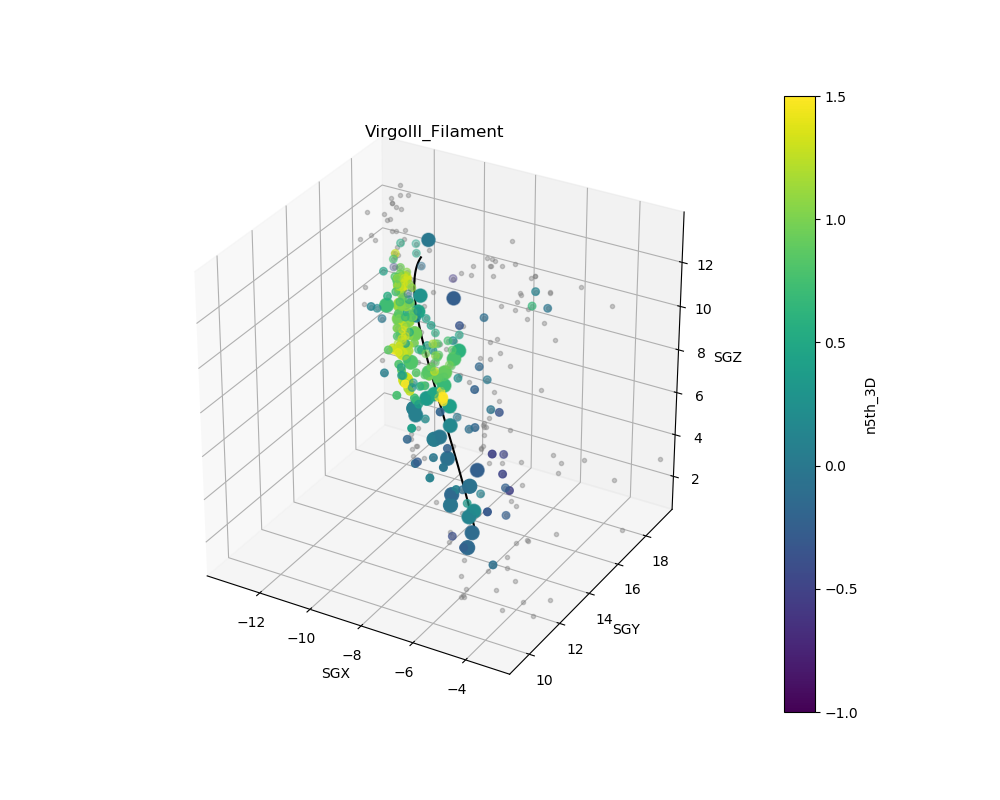

<IPython.core.display.Javascript object>


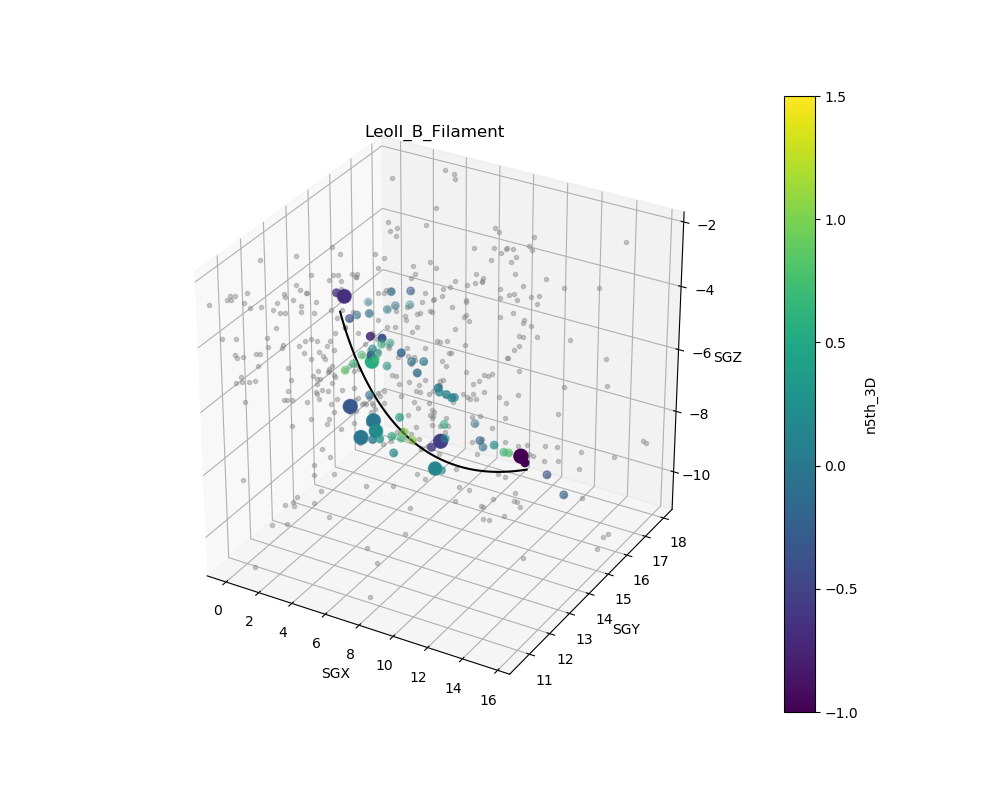

<IPython.core.display.Javascript object>


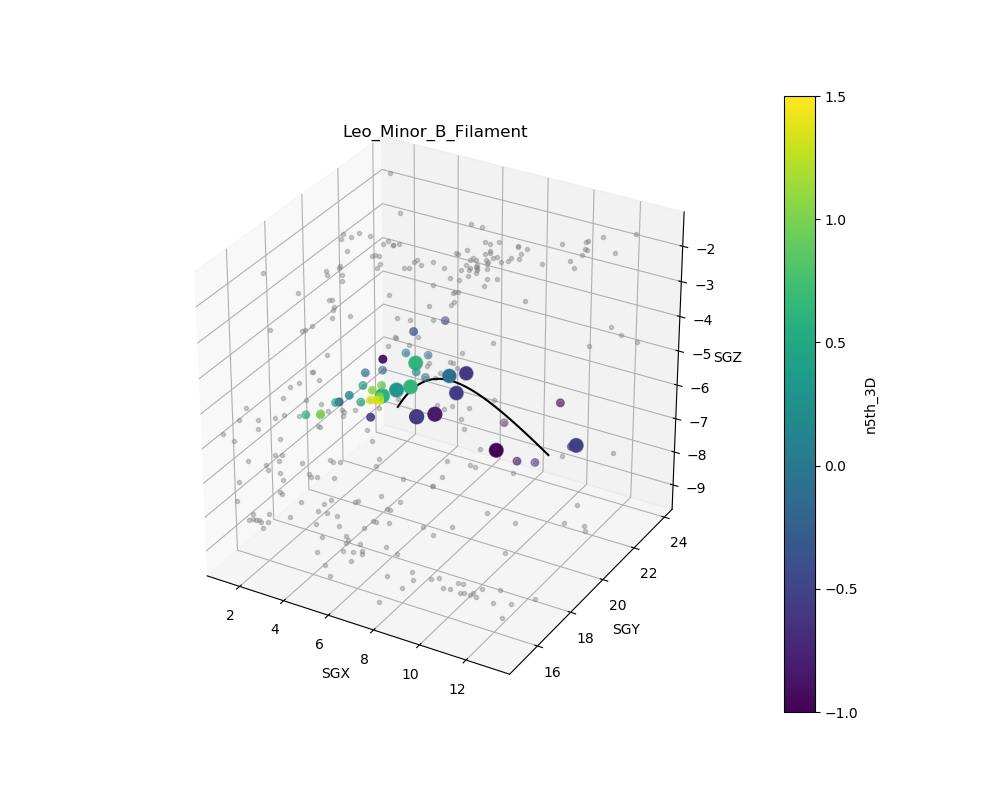

<IPython.core.display.Javascript object>


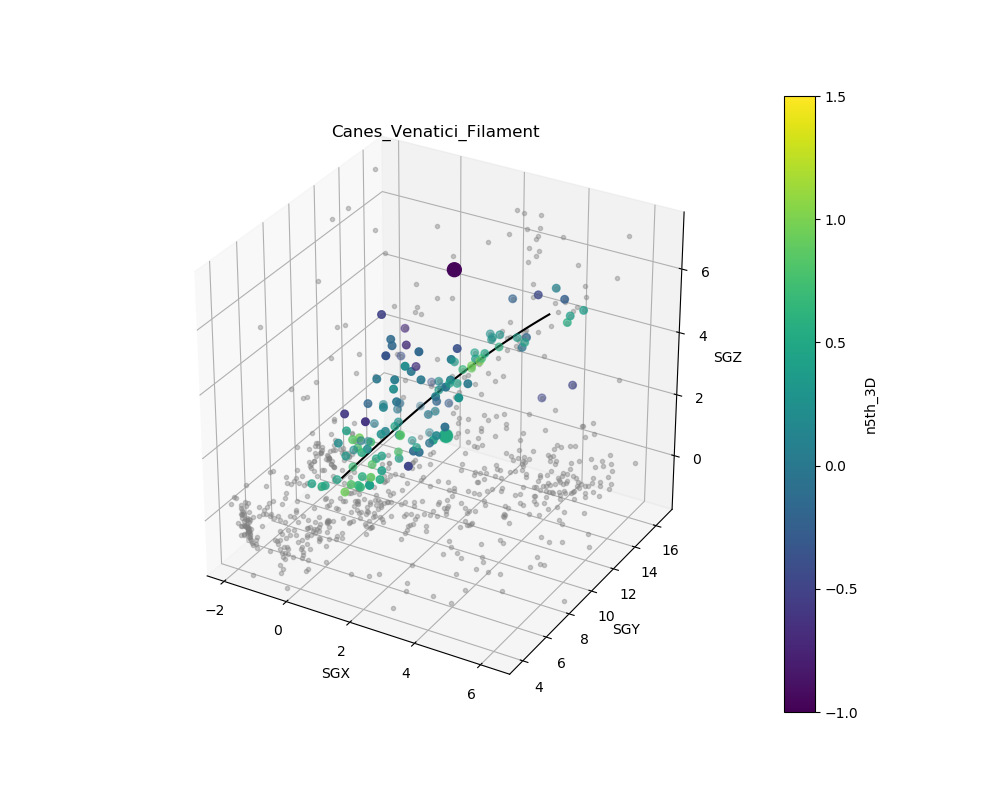

<IPython.core.display.Javascript object>


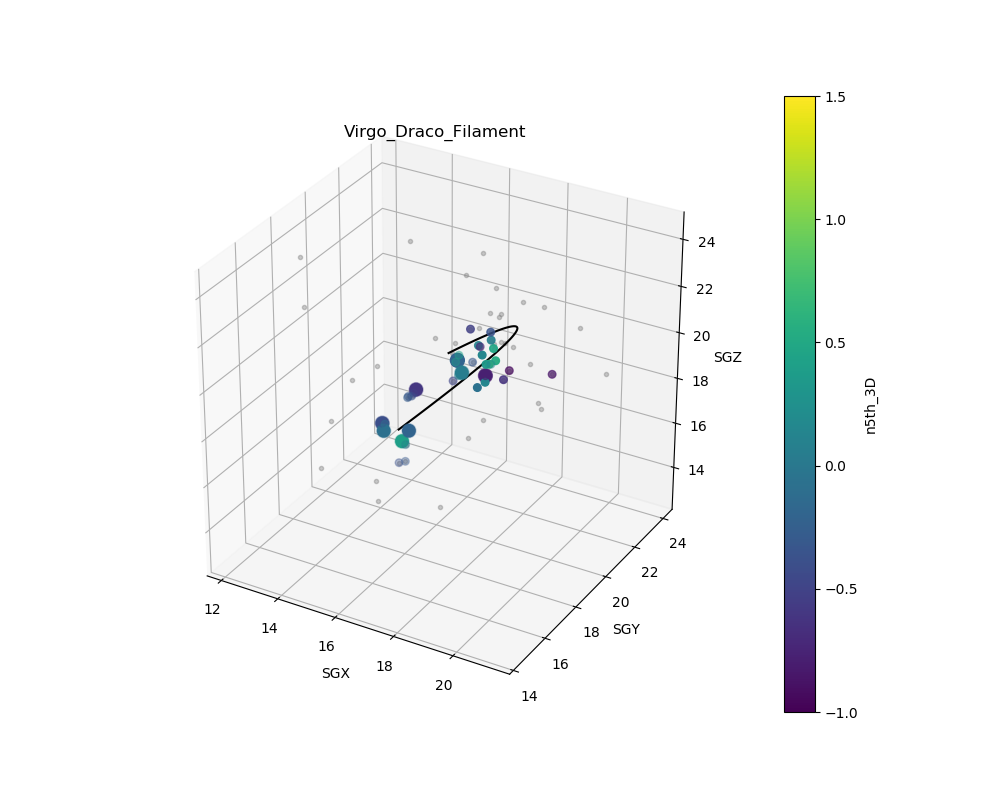

In [67]:
for fil in allfil:
    filament_string = fil
    filflag = (v.fil['filament'] == filament_string) & (v.fil['filament_member'])
    # set limits of cube
    fxlim = virgoCommon.SGXrange[filament_string]
    fylim = virgoCommon.SGYrange[filament_string]
    fzlim = virgoCommon.SGZrange[filament_string]
    
    #boxsize = np.max(deltas)
    # read in spine
    spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
    spine  = Table.read(spinedir+'filament_spine_'+filament_string+'.fits')
    #plot3d_colorby_dist3D(flag=filflag)
    plot3d_colorby_localdens(flag=filflag)

<IPython.core.display.Javascript object>


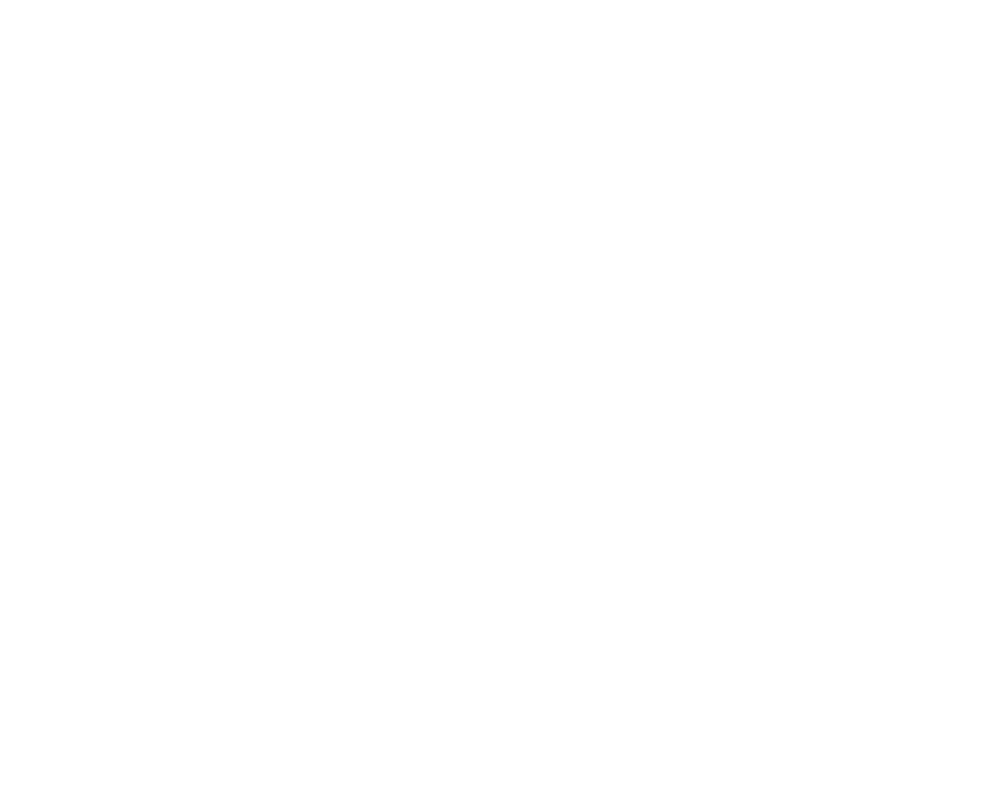

<IPython.core.display.Javascript object>


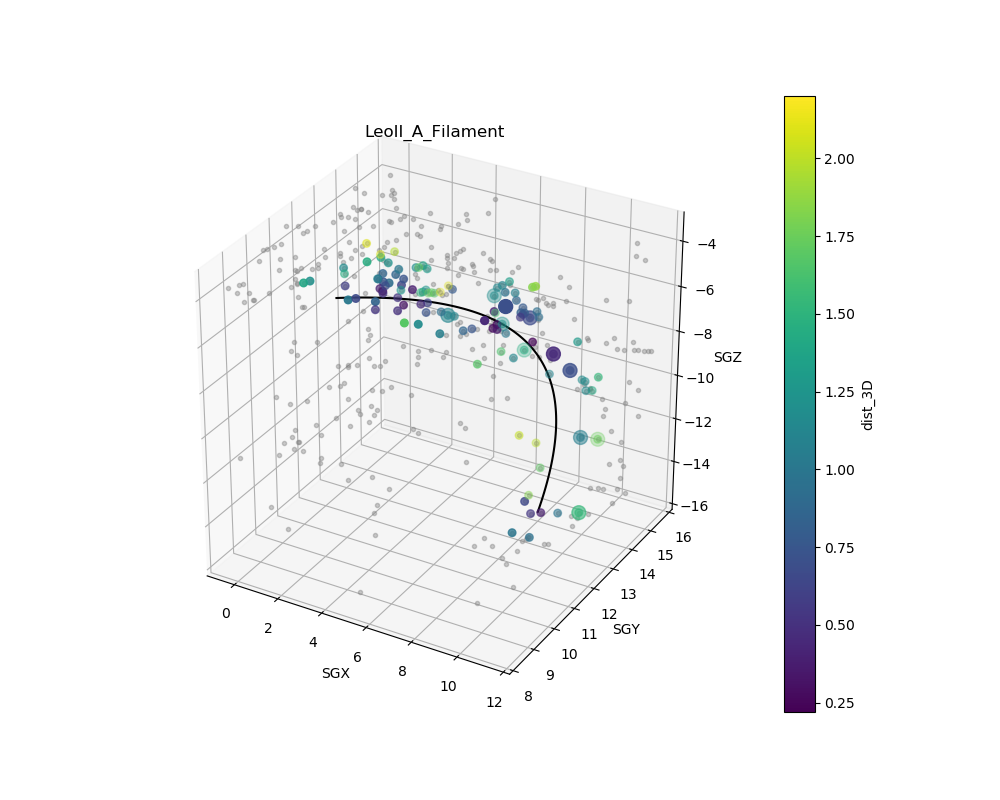

KeyError: 'Leo_Minor_B_Filament'

In [133]:
for fil in allfil:
    filament_string = fil
    filflag = (v.fil['filament'] == filament_string) & (v.fil['filament_member'])
    # set limits of cube
    fxlim = virgoCommon.SGXrange[filament_string]
    fylim = virgoCommon.SGYrange[filament_string]
    fzlim = virgoCommon.SGZrange[filament_string]
    # read in spine
    spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
    spine  = Table.read(spinedir+'filament_spine_'+filament_string+'.fits')
    plot3d_colorby_dist3D()
    #plot3d_colorby_mass()

<IPython.core.display.Javascript object>


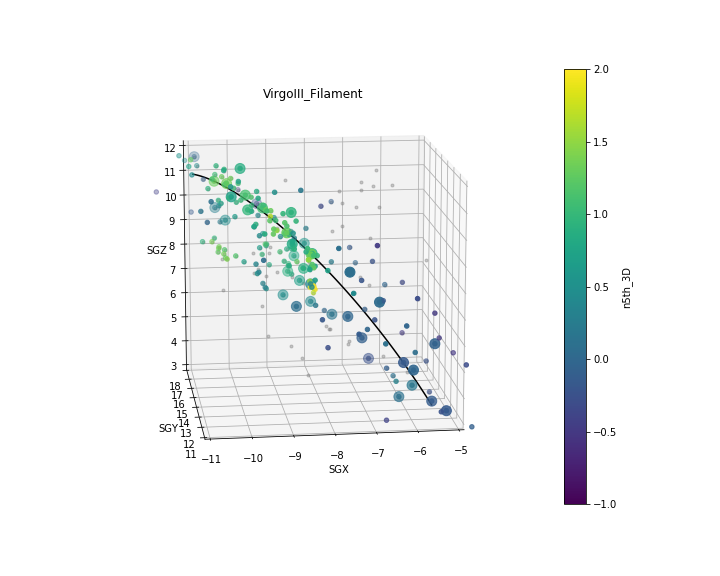

In [82]:
plot3d_colorby_localdens()

# Filament Names

* our current set of names is

In [9]:
from astropy.coordinates import get_constellation
from astropy.coordinates import SkyCoord

In [7]:
os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])
print(allfil)

{'Virgo_Northern_Filament', 'NGC5353_4_Filament', 'Filament_3', 'LeoII_A_Filament', 'LeoII_B_Filament', 'Leo_Minor_Filament', 'Filament_3b', 'VirgoIII_Filament_Extension', 'W-M_Sheet', 'VirgoIII_Filament', 'Ursa_Major_Cloud'}


##############################
###   Virgo_Northern_Filament
##############################


<IPython.core.display.Javascript object>


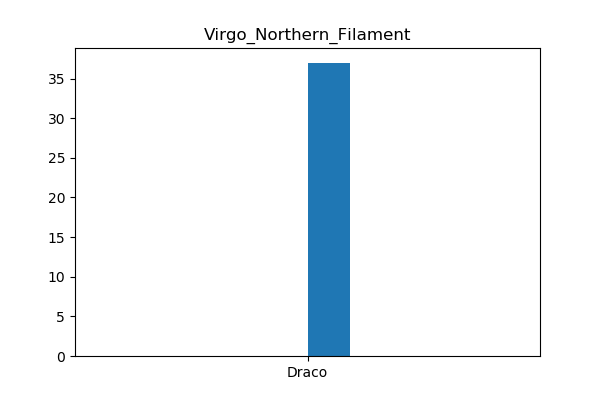

##############################
###   NGC5353_4_Filament
##############################


<IPython.core.display.Javascript object>


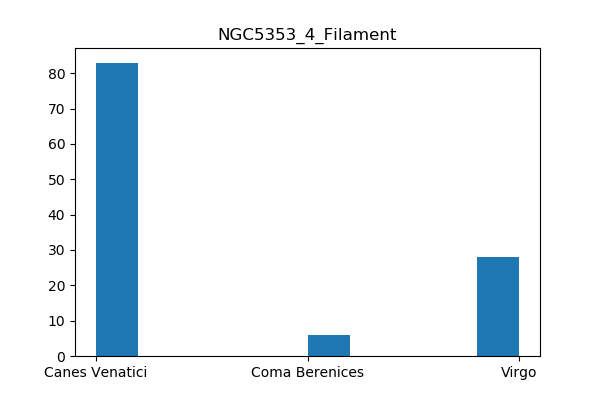

##############################
###   Filament_3
##############################


<IPython.core.display.Javascript object>


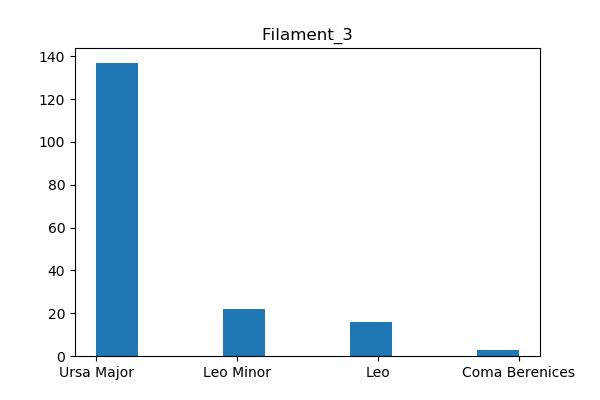

##############################
###   LeoII_A_Filament
##############################


<IPython.core.display.Javascript object>


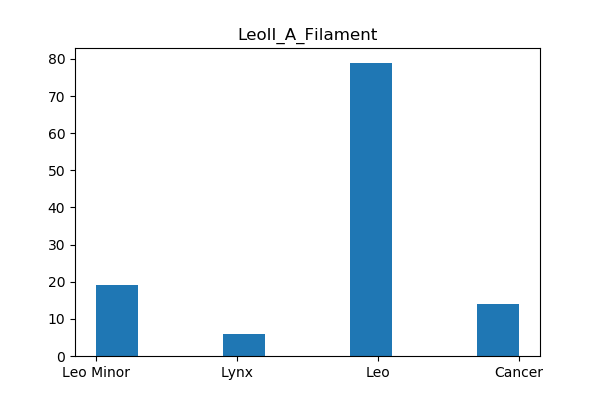

##############################
###   LeoII_B_Filament
##############################


<IPython.core.display.Javascript object>


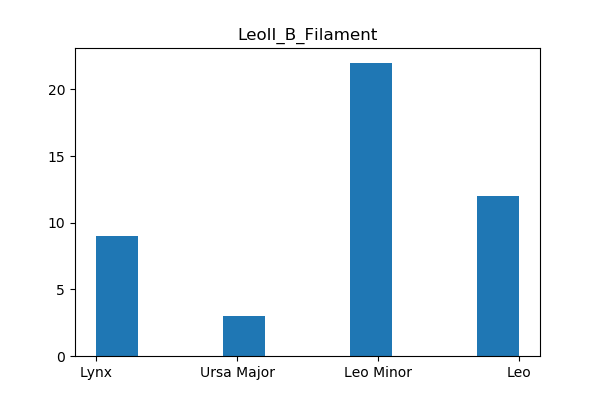

##############################
###   Leo_Minor_Filament
##############################


<IPython.core.display.Javascript object>


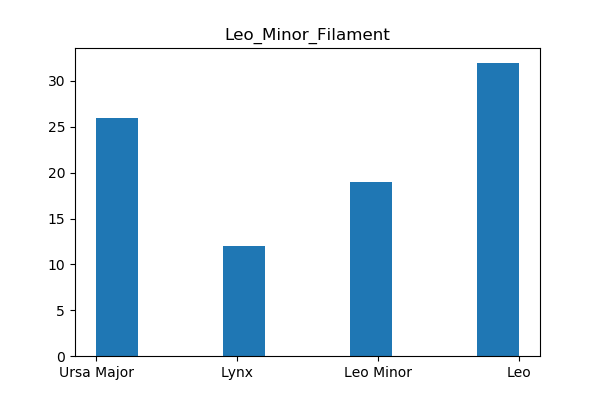

##############################
###   Filament_3b
##############################


<IPython.core.display.Javascript object>


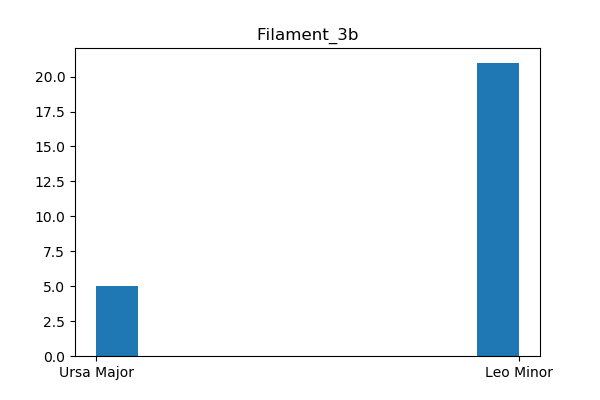

##############################
###   VirgoIII_Filament_Extension
##############################


<IPython.core.display.Javascript object>


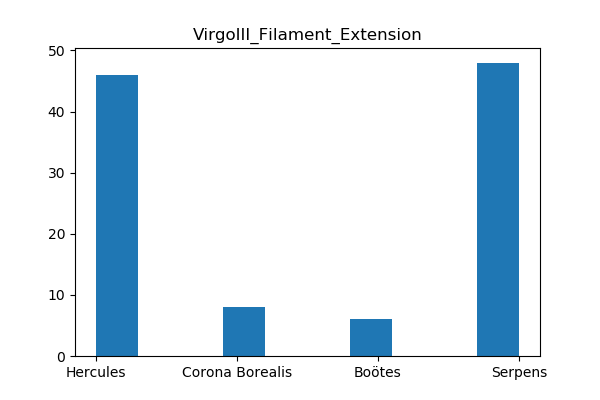

##############################
###   W-M_Sheet
##############################


<IPython.core.display.Javascript object>


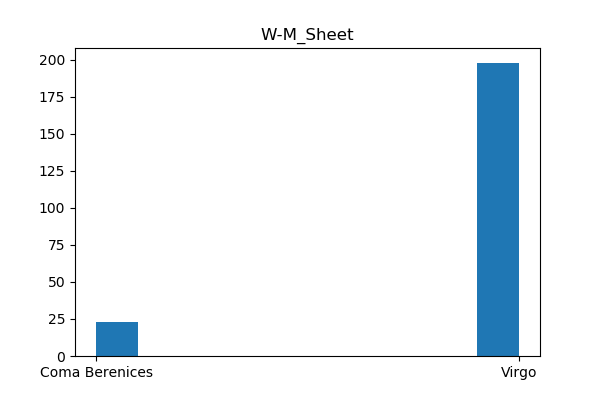

##############################
###   VirgoIII_Filament
##############################


<IPython.core.display.Javascript object>


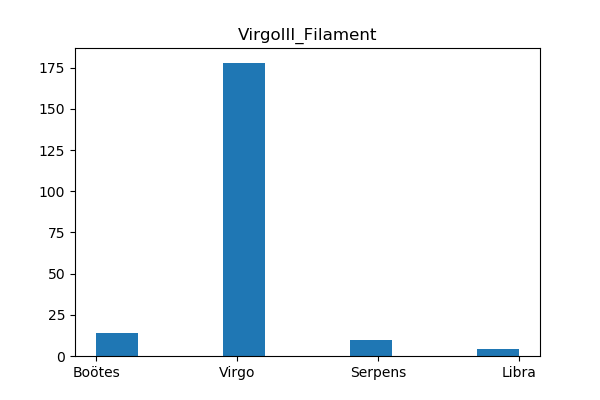

##############################
###   Ursa_Major_Cloud
##############################


<IPython.core.display.Javascript object>


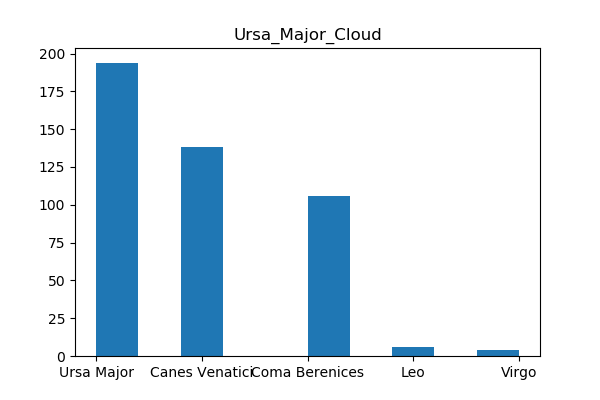

In [42]:
for f in allfil:
    print('##############################')
    print('###  ',f)
    print('##############################')
    flag = v.fil['filament'] == f
    fcoord = SkyCoord(v.main['RA'][flag],v.main['DEC'][flag],unit='deg',frame='icrs')
    fconst = get_constellation(fcoord)
    #print(fconst)
    plt.figure(figsize=(6,4))
    t = plt.hist(fconst)
    plt.title(f)
    a,b = plt.xticks()
    try:
        print('most frequency constellation = ',b[t[0] == max(t[0])])
    except TypeError:
        #print('is it obvious?')
        continue
    print('')
    time.sleep(.5)

# Visualizing Filaments in SGX-SGZ plane, in chunks of SGY

Kim+2016 say that they visually identify filaments by looking for structures that persist in multiple cuts of SGY

In [99]:
# read in tables

plotdir = '/home/rfinn/research/Virgo/plots/'
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtables.py

In [45]:
def plotspines(ymin,ymax):
    spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
    sfiles = glob.glob(spinedir+"*.fits")
    for f in sfiles:
        spine  = Table.read(f)
        flag = (spine['SGY'] > ymin) & (spine['SGY'] < ymax)
        fname = os.path.basename(f).replace('filament_spine_','').replace('.fits','').replace('_Filament','')
        plt.plot(spine['SGX'][flag],spine['SGZ'][flag],lw=3,zorder=15,label=fname)

<IPython.core.display.Javascript object>


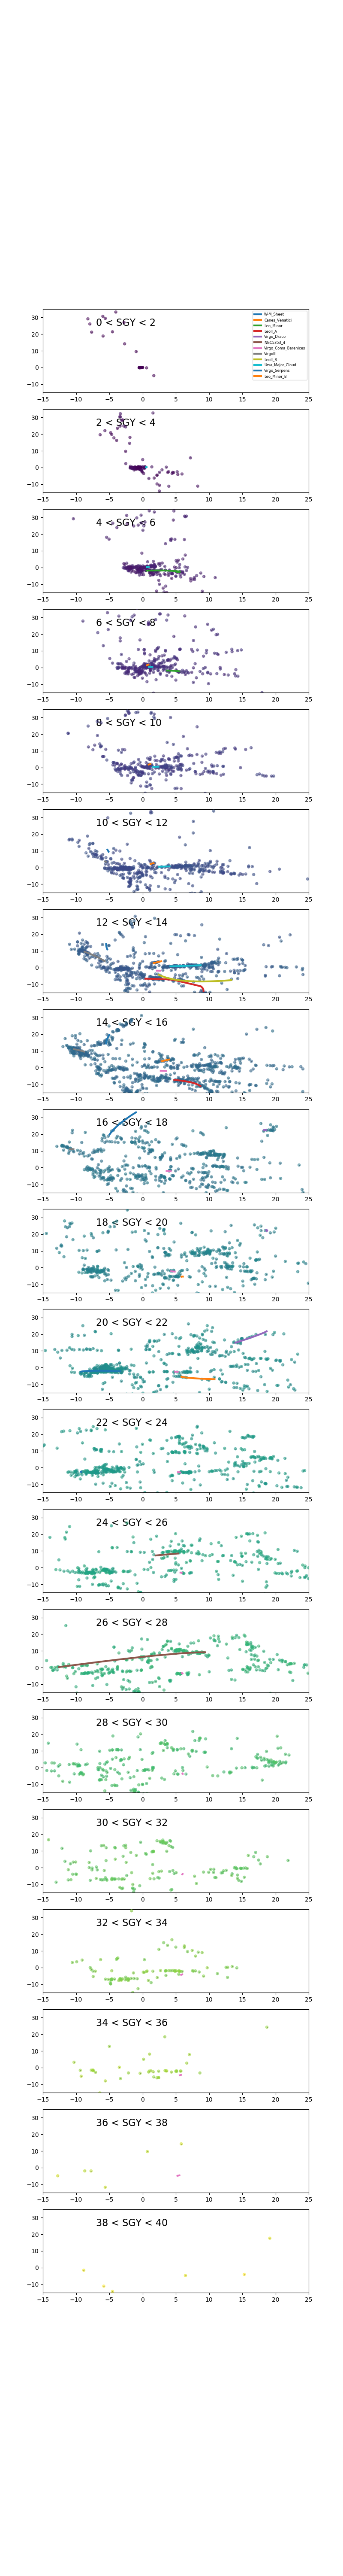

In [61]:
x = v.env['SGX']
y = v.env['SGY']
z = v.env['SGZ']

delta_y = 2
ymin=np.arange(0,40,delta_y)
ymax = ymin + delta_y
nrows = len(ymin)
ra=v.main['RA']
dec = v.main['DEC']


plt.figure(figsize=(8,60))
for i in range(len(ymin)):
    plt.subplot(nrows,1,i+1)
    yflag = (y < ymax[i]) & (y > ymin[i])
    #plt.plot(ra,dec,'k.',color='.5',alpha=.5)
    plt.plot(x[yflag],z[yflag],'k.',color='.2',alpha=.5,markersize=2)
    fflag = yflag & (v.fil['filament'] != '---')
    plt.scatter(x[fflag],z[fflag],c=y[fflag],s=20,vmin=2,vmax=40,zorder=10,alpha=.5)
    s = '%i < SGY < %i'%(ymin[i],ymax[i])
    plt.text(.2,.8,str(s),fontsize=16,transform=plt.gca().transAxes)
    plotspines(ymin[i],ymax[i])
    plt.axis([-15,25,-15,35])
    # zooming in to new structure
    #plt.axis([5,15,5,15])
    if i == 0:
        plt.legend(fontsize=6)
#plt.savefig('filaments-SGY-slice.pdf')

# Make 3D Plot of new filament

In [71]:
xc = -2.3
yc = 9.9
zc=-0.42
xmin = xc-5
xmax = xc+5
ymin = yc-10
ymax = yc+10
zmin = zc-5
zmax = zc+5

x = v.fil['SGX']
y = v.fil['SGY']
z = v.fil['SGZ']

flag = (x > xmin) & (x < xmax) & (y > ymin) & (y < ymax) & (z > zmin) & (z < zmax)


<IPython.core.display.Javascript object>


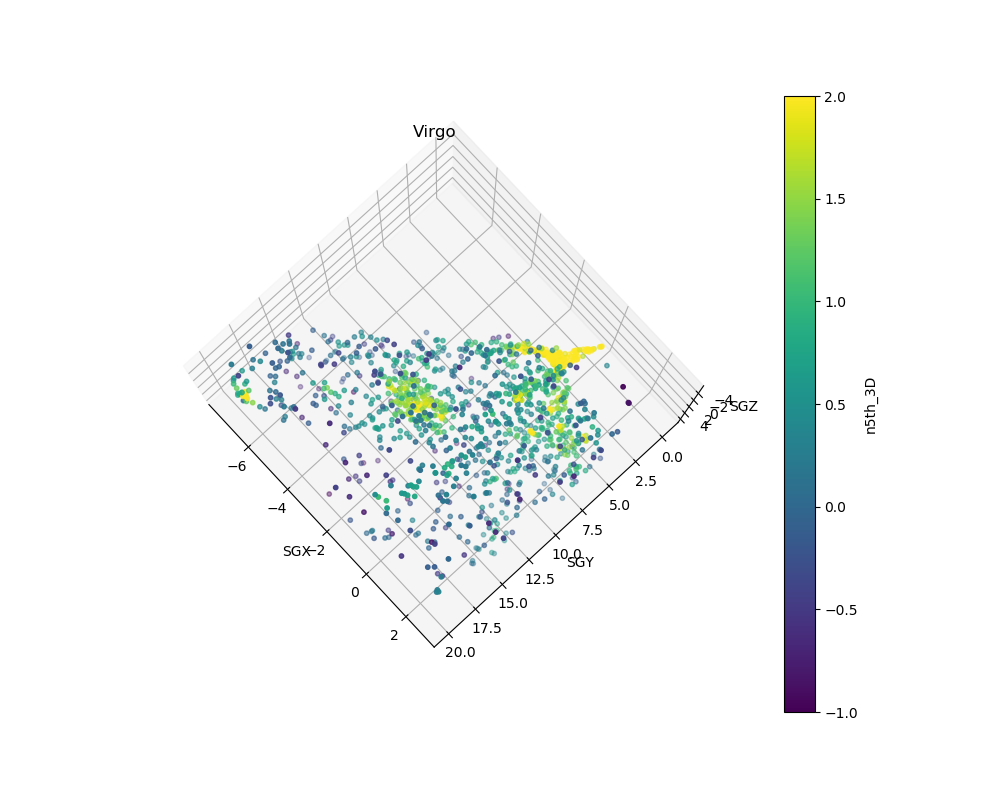

Text(0.5, 0, 'SGZ')

In [72]:
filament_string='Virgo'
vmin,vmax = -1,2
color = np.log10(v.env['n5th'])
colorname='n5th_3D'
 
#vmin,vmax = 8,10
#color = np.log10(v.nsav0['MASS'])
#colorname='Mass'
fig = plt.figure(figsize=(10,8)) 
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
p = ax.scatter(v.fil['SGX'][flag], v.fil['SGY'][flag], v.fil['SGZ'][flag],c=color[flag],s=10,vmin=vmin,vmax=vmax)
fig.colorbar(p,label=colorname)
#ax.plot3D(v.fil['SGX'][clipflag], v.fil['SGY'][clipflag], v.fil['SGZ'][clipflag],'c.',color='0.5',alpha=.4) 
ax.set_title(filament_string)
ax.set_xlabel('SGX')
ax.set_ylabel('SGY')
ax.set_zlabel('SGZ')

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


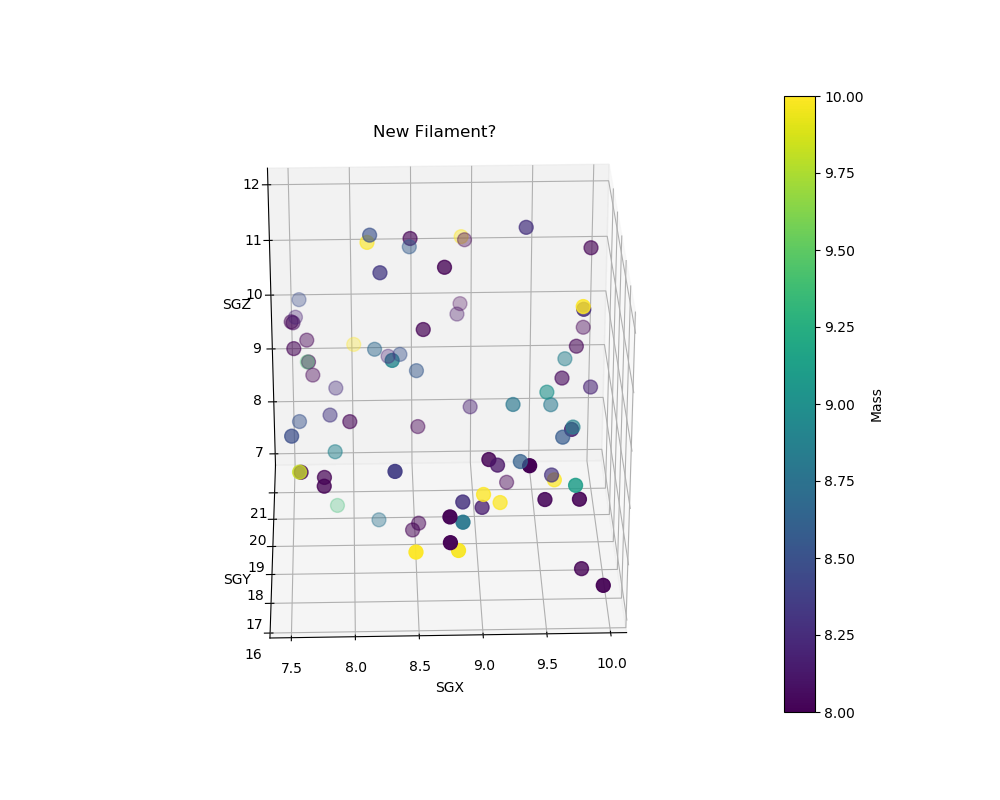

Text(0.5, 0, 'SGZ')

In [57]:
vmin,vmax = 8,10
color = np.log10(v.nsav0['MASS'])
colorname='Mass'
fig = plt.figure(figsize=(10,8)) 
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
p = ax.scatter(v.fil['SGX'][flag], v.fil['SGY'][flag], v.fil['SGZ'][flag],c=color[flag],s=100,vmin=vmin,vmax=vmax)
fig.colorbar(p,label=colorname)
#ax.plot3D(v.fil['SGX'][clipflag], v.fil['SGY'][clipflag], v.fil['SGZ'][clipflag],'c.',color='0.5',alpha=.4) 
ax.set_title(filament_string)
ax.set_xlabel('SGX')
ax.set_ylabel('SGY')
ax.set_zlabel('SGZ')

<IPython.core.display.Javascript object>


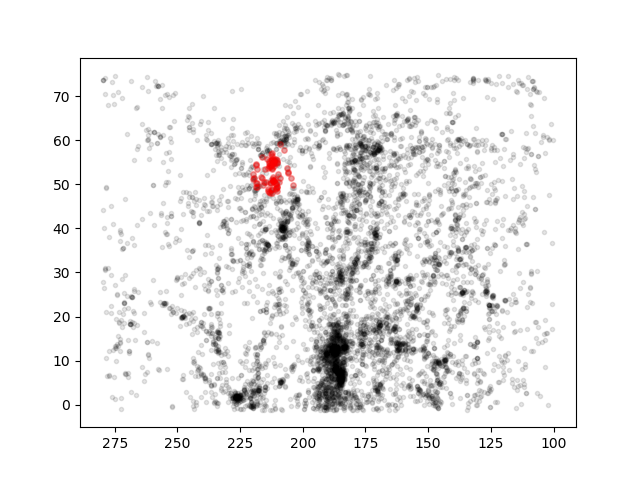

In [51]:
plt.figure()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1)
x = v.fil['SGX']
y = v.fil['SGY']
z = v.fil['SGZ']
flag = (x > 7.5) & (x < 10) & (z > 6 ) & (z < 12) & (y > 16) & (y < 22)
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ro',markersize=4,alpha=.3)
plt.gca().invert_xaxis()

# Write out data for Mary McColgan

* cube with Virgo III filament
  * ID
  * SGX, SGY, SGZ
  * mass
  * brightness
  * size

* spine

* all files in csv

In [23]:
v.fil

<Table length=6797>
       SGY                 SGX         ...      filament       objname  
     float64             float64       ...      bytes40        bytes28  
------------------ ------------------- ... ------------------ ----------
11.738032079989287  13.145689815736862 ...   Ursa_Major_Cloud    NGC4363
 7.017661982903995    7.90894905971585 ... Leo_Minor_Filament    NGC4133
18.236938715608805   24.57232008873139 ...   LeoII_B_Filament    NGC2977
  14.3805709158205   16.04972421363977 ...   Ursa_Major_Cloud  PGC040048
 13.42946756799603  15.062039166171804 ...   Ursa_Major_Cloud   UGC07189
 14.24733084177353   16.36887945443161 ...   Ursa_Major_Cloud    NGC3752
14.429624490058709  23.823428368645985 ...   LeoII_B_Filament   UGC04202
13.506784603390928  23.147324448597697 ...   LeoII_B_Filament  PGC022064
  6.34142153819484  11.358746335611848 ...   Ursa_Major_Cloud    NGC6643
 13.57513261426242   15.04051810675452 ...   Ursa_Major_Cloud   UGC07238
               ...                 ... ...                ...        ...
26.677692322485886 -13.486639599767207 ... NGC5353_4_Filament   UGC07883
15.365245806045172 -10.329395658436509 ...  VirgoIII_Filament PGC1123741
6.4060681149299725 -2.1699810543271267 ... Leo_Minor_Filament PGC3286596
 26.00767790775234 -13.290425037005736 ... NGC5353_4_Filament PGC1123239
19.900737222095287   -9.58565131384563 ...          W-M_Sheet  PGC040683
17.414428225304132 -7.3066119171159345 ...          W-M_Sheet GAMA143446
24.621041828170757  -9.456379013071517 ...          W-M_Sheet PGC3288547
 23.16470968032566 -10.745670987988538 ...          W-M_Sheet PGC1122171
  21.9139265433092  -10.68297698963353 ...          W-M_Sheet  PGC135806
 10.46500368374368  -4.664287144328092 ...  VirgoIII_Filament   UGC07000

In [25]:
v3flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.fil['filament_member'])

In [33]:
marytab = Table([v.main['VFID'][v3flag],v.main['radius'][v3flag],\
                 v.fil['SGX'][v3flag],v.fil['SGY'][v3flag],v.fil['SGZ'][v3flag],\
                 v.nsav0['MASS'][v3flag],v.rphot['M_r'][v3flag],v.fil['filament_dist_3D'][v3flag]])

In [34]:
marytab

<Table length=207>
  VFID     radius   ...         M_r          filament_dist_3D 
           arcsec   ...                                       
 bytes8   float32   ...       float64            float64      
-------- ---------- ... ------------------- ------------------
VFID4311       50.0 ... -13.440549373051574  4.296339404088304
VFID4469   9.486833 ... -11.605065231674136  4.011115208111628
VFID4619   17.66531 ... -16.886146879785912 3.8106451543815525
VFID5047   17.66531 ... -14.914286796055944 1.4378729052924988
VFID5133       15.0 ...  -8.173275256865448 1.3583225253876747
VFID5160   14.89777 ... -17.087396306848188 1.8041160003549845
VFID5170   77.11187 ... -20.005411824856417 1.4968672812423838
VFID5255  19.083843 ... -13.981861161023854 1.5873912765098612
VFID5296  17.550526 ... -14.421927285576096 1.5542431256953075
     ...        ... ...                 ...                ...
VFID6706  55.734135 ... -14.848010615128157 2.1552643582087603
VFID6724   8.435702 ... -15.275768878827783 1.7732123721103414
VFID6730   8.494176 ... -14.609259149093148  1.947653593346706
VFID6744  40.468887 ... -19.920080132090842 1.9870979314224697
VFID6746   8.874038 ... -15.280018258441949 2.0974727461841165
VFID6748  16.677128 ... -11.414467580381789 1.9690579951536769
VFID6767  18.841751 ...  -17.26467325389765 1.3168289517486196
VFID6768   9.486833 ... -15.780629799660272  1.587115239553596
VFID6773 106.444016 ... -21.242691666108655 1.4903784202441275
VFID6774 13.6811075 ... -17.037768434073662 1.3053118767578136

In [31]:
!pwd

/home/rfinn/research/Virgo/plots


In [35]:
marytab.write('VirgoIII-filament.csv',format='csv')

In [37]:
v3spine = Table.read('/home/rfinn/research/Virgo/tables-north/spines/filament_spine_VirgoIII_Filament.fits')

In [38]:
v3spine.write('VirgoIII-spine.csv',format='csv')